Assignment: Flowers Recognition <br>
Dataset Description:<br>

This dataset contains 4242 images of flowers.<br>
The data collection is based on the data flicr, google images, yandex images.<br>
You can use this datastet to recognize plants from the photo.<br>

Attribute Information:<br>
The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.<br>
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. <br>
<b>Also explore how to resize images in tensorflow and then resize all the images to a same size. </b> <br>
This is a Multiclass Classification Problem.<br>


WORKFLOW : <br>
Load Data <br>
Split into 60 and 40 ratio.<br>
Encode labels.<br>
Create Model<br>
Compilation Step (Note : Its a Multiclass Classification problem , select loss , metrics according to it)<br>
Train the Model.<br>
If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .<br>
Prediction should be > 85%<br>
Evaluation Step<br>
Prediction<br>

Data : <br>
https://drive.google.com/file/d/1-OX6wn5gA-bJpjPNfSyaYQLz-A-AB_uj/view?usp=sharing

In [8]:
import numpy as np
from os import listdir
import os
from os.path import join
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import sklearn

In [5]:
data = "/content/drive/MyDrive/DL_Assignments_PIAIC/flowers"
folders = os.listdir(data)
print(folders)

['dandelion', 'tulip', 'sunflower', 'daisy', 'rose']


In [6]:
image_names = []
labels = []
data_images = []


size = 28,28

for folder in folders:
    for file in os.listdir(os.path.join(data,folder)):
        if file.endswith("jpg"):
            image_names.append(os.path.join(data,folder,file))
            labels.append(folder)
            img = cv2.imread(os.path.join(data,folder,file))
            im = cv2.resize(img,size)
            data_images.append(im)
        else:
            continue

In [9]:
label_dummies = pd.get_dummies(labels)
labels =  label_dummies.values.argmax(1)

In [10]:
labels=np.asarray(labels).astype("float32")
data = np.asarray(data_images).astype("float32")/255.0

In [11]:
print(f"Shape of images is :{data.shape}")
print(f"Shape of labels is :{labels.shape}")

Shape of images is :(4323, 28, 28, 3)
Shape of labels is :(4323,)


In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data,labels,test_size=.40,random_state=1)

In [13]:
X_train[0]

array([[[0.78039217, 0.7137255 , 0.6901961 ],
        [0.81960785, 0.75686276, 0.7411765 ],
        [0.83137256, 0.76862746, 0.7411765 ],
        ...,
        [0.8       , 0.7372549 , 0.7137255 ],
        [0.8039216 , 0.7294118 , 0.7019608 ],
        [0.7882353 , 0.7254902 , 0.7137255 ]],

       [[0.7921569 , 0.7294118 , 0.7254902 ],
        [0.81960785, 0.75686276, 0.73333335],
        [0.8156863 , 0.7490196 , 0.7372549 ],
        ...,
        [0.79607844, 0.7254902 , 0.72156864],
        [0.7921569 , 0.7372549 , 0.7058824 ],
        [0.78431374, 0.7254902 , 0.7176471 ]],

       [[0.8       , 0.7411765 , 0.7176471 ],
        [0.8117647 , 0.7529412 , 0.72156864],
        [0.8156863 , 0.7529412 , 0.7294118 ],
        ...,
        [0.7921569 , 0.7294118 , 0.7058824 ],
        [0.7764706 , 0.72156864, 0.69803923],
        [0.7647059 , 0.7176471 , 0.69411767]],

       ...,

       [[0.14509805, 0.42745098, 0.40392157],
        [0.2627451 , 0.4745098 , 0.5019608 ],
        [0.10196079, 0

In [14]:

y_train[0]

3.0

In [23]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense
network =Sequential()
network.add(Conv2D(8, (1,1),input_shape=(28, 28, 3),activation='relu'))
network.add(MaxPool2D(pool_size=(1,1)))
network.add(Conv2D(16, (1,1),activation='relu'))
network.add(MaxPool2D(pool_size=(2,2)))
network.add(Flatten())
network.add(Dense(128,activation='relu'))
network.add(Dense(5,activation="softmax"))

In [24]:
network.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 8)         32        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 16)        144       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               401536    
_________________________________________________________________
dense_3 (Dense)              (None, 5)                

In [39]:
network.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
batch_size = 1
epochs = 22
history=network.fit(X_train, y_train,batch_size=batch_size,epochs=epochs)

Epoch 1/22
2593/2593 [==============================] - 10s 4ms/step - loss: 0.0306 - accuracy: 0.9937
Epoch 2/22
2593/2593 [==============================] - 9s 4ms/step - loss: 0.0978 - accuracy: 0.9849
Epoch 3/22
2593/2593 [==============================] - 10s 4ms/step - loss: 0.0156 - accuracy: 0.9946
Epoch 4/22
2593/2593 [==============================] - 10s 4ms/step - loss: 0.0224 - accuracy: 0.9928
Epoch 5/22
2593/2593 [==============================] - 10s 4ms/step - loss: 0.0427 - accuracy: 0.9912
Epoch 6/22
2593/2593 [==============================] - 10s 4ms/step - loss: 0.0298 - accuracy: 0.9900
Epoch 7/22
2593/2593 [==============================] - 10s 4ms/step - loss: 0.0587 - accuracy: 0.9840
Epoch 8/22
2593/2593 [==============================] - 9s 4ms/step - loss: 0.0155 - accuracy: 0.9959
Epoch 9/22
2593/2593 [==============================] - 9s 3ms/step - loss: 0.0125 - accuracy: 0.9972
Epoch 10/22
2593/2593 [==============================] - 9s 3ms/step - loss:

In [40]:
history_dict = history.history
history_dict.keys()
[u'accuracy', u'loss']

['accuracy', 'loss']

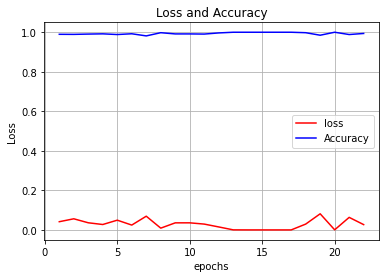

In [41]:
history_dict = history.history
loss_values = history_dict['loss']
val_accuracy = history_dict['accuracy']
epochs = range(1, len(history_dict['accuracy']) + 1)
plt.plot(epochs, loss_values, 'r', label='loss')
plt.plot(epochs, val_accuracy, 'b', label='Accuracy')
plt.title('Loss and Accuracy')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [42]:
network.evaluate(X_test,y_test)

55/55 [==============================] - 0s 5ms/step - loss: 5.3972 - accuracy: 0.6069


[5.397195816040039, 0.6069363951683044]

In [43]:
pred = network.predict_classes(X_test[:10])
for i in range(len(pred)):
    print(pred[i],'==>',y_test[i])

4 ==> 2.0
4 ==> 4.0
3 ==> 3.0
4 ==> 4.0
3 ==> 3.0
3 ==> 3.0
3 ==> 3.0
2 ==> 2.0
1 ==> 4.0
0 ==> 4.0


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


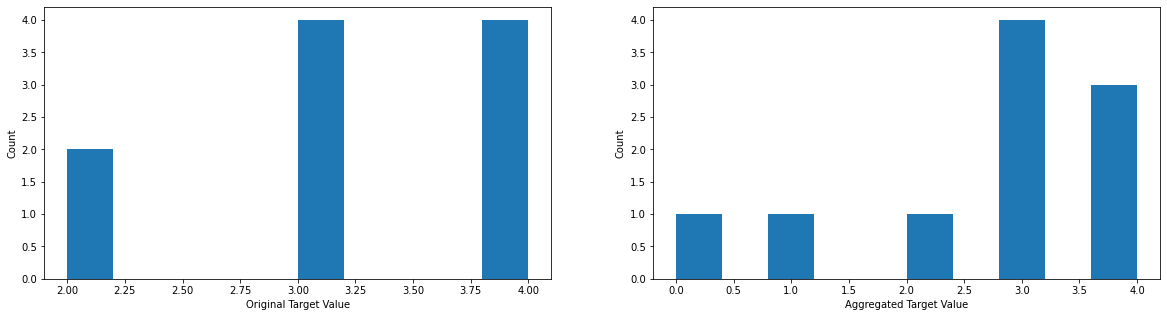

In [44]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1 )
plt.hist(y_test[:10])
plt.xlabel('Original Target Value')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
plt.hist(pred)
plt.xlabel('Aggregated Target Value')
plt.ylabel('Count')
plt.show()